# Week1 
## Diabetes Classification
당뇨병 데이터에 대해 아래의 작업을 수행해 보자.

- Classification -> Outcome 예측
    - 머신러닝의 5가지 classification 알고리즘
    - 딥러닝(dense layer)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.shape

(768, 9)

In [5]:
# 결측치 확인
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
'''
    Pregnancies: 임신 횟수
    Glucose: 포도당 수치
    BloodPressure: 혈압
    SkinThickness: 피부 두께
    Insulin: 인슐린 수치
    BMI: 체질량지수 (BMI)
    DiabetesPedigreeFunction: 당뇨 유전적 계보 함수
    Age: 나이
    Outcome: 결과 (당뇨병 여부)
'''

'\n    Pregnancies: 임신 횟수\n    Glucose: 포도당 수치\n    BloodPressure: 혈압\n    SkinThickness: 피부 두께\n    Insulin: 인슐린 수치\n    BMI: 체질량지수 (BMI)\n    DiabetesPedigreeFunction: 당뇨 유전적 계보 함수\n    Age: 나이\n    Outcome: 결과 (당뇨병 여부)\n'

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Glucose(포도당), BloodPressure(혈압), Skin Thickness(피부 두께), Insulin(인슐린 수치) BMI에서 최소값이 0이 나타나는 것으로 보아 oulier가 있는 것 같다. 이를 시각화해보자.

C:\Users\user\AppData\Local\Temp\ipykernel_18008\1589747868.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


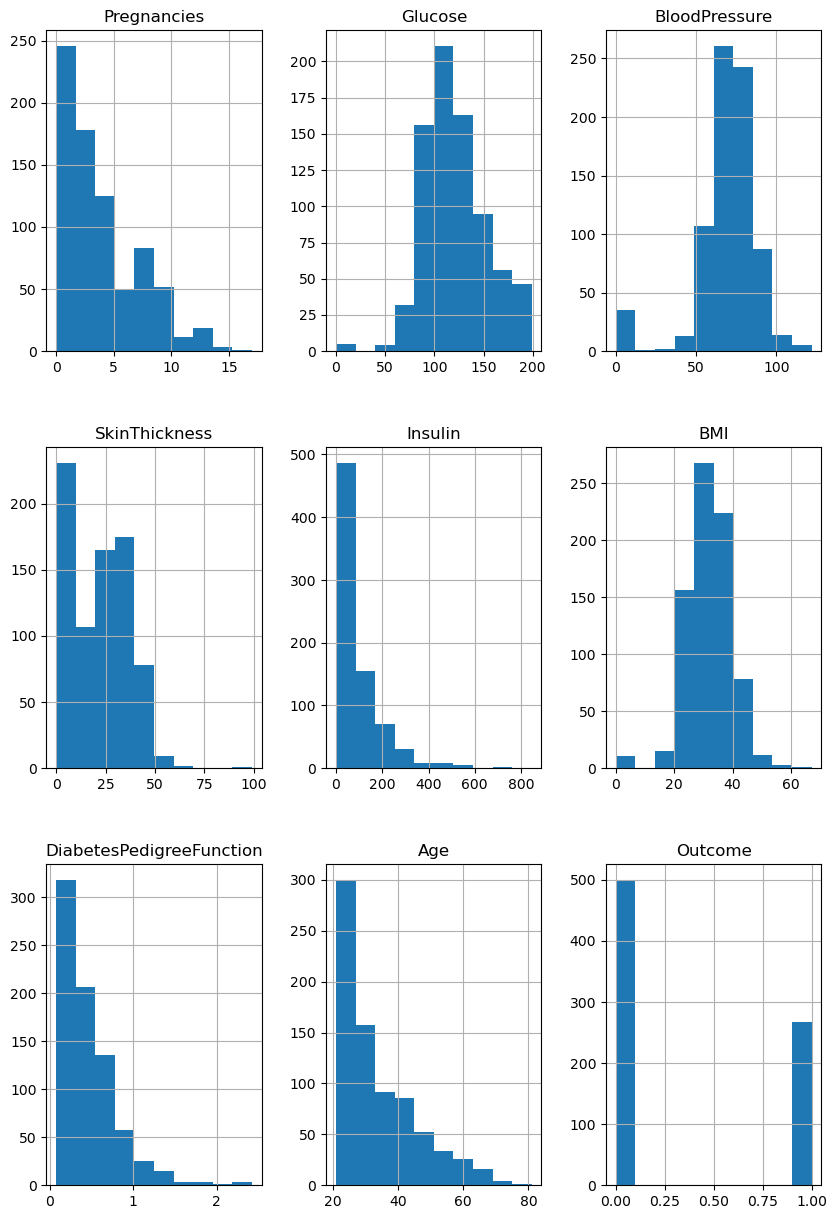

In [16]:
# 시각화
fig = plt.figure(figsize = (10,15))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [32]:
# dirty data 비율 확인
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
tot_data = df.shape[0]

for feat in zero_features:
    zero_cnt = df[df[feat] == 0][feat].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2: .2f}%'.format(feat, zero_cnt, 100 * (zero_cnt / tot_data)))

Glucose 0 건수는 5, 퍼센트는  0.65%
BloodPressure 0 건수는 35, 퍼센트는  4.56%
SkinThickness 0 건수는 227, 퍼센트는  29.56%
Insulin 0 건수는 374, 퍼센트는  48.70%
BMI 0 건수는 11, 퍼센트는  1.43%


SkinThickness와 Insulin에서 꽤 높은 비율로 dirty data가 들어갔음을 확인할 수 있다.  
이 값들을 평균값으로 대체하겠다.

In [35]:
mean_zero_features = df[zero_features].mean()
df[zero_features] = df[zero_features].replace(0, mean_zero_features)

Text(0.5, 1.0, 'Outcome')

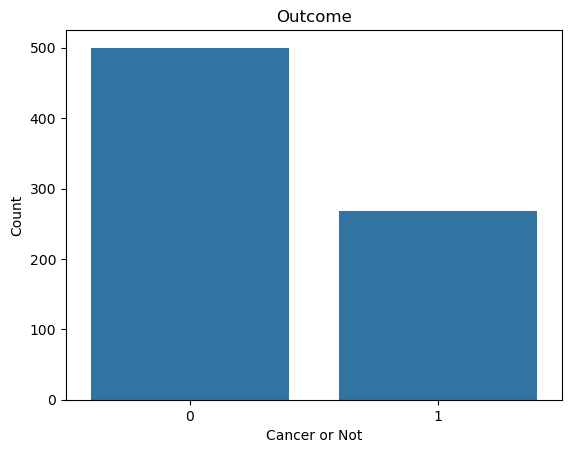

In [12]:
# 레이블 개수 확인 (그래프)
sns.countplot(data = df, x="Outcome")
plt.xlabel("Cancer or Not")
plt.ylabel("Count")
plt.title("Outcome")

In [13]:
# Outcome 개수 확인 (숫자)
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

imbalanced data이므로 train, test split시 stratify한다.

In [44]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size = 0.25, stratify=y, random_state = 0)

In [48]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [50]:
# 평가
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def clf_score(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'accuracy : {accuracy}, precision: {precision}, recall : {recall}, f1 : {f1}')
    

# Classification

## ML
- SVM, LR, RF, DT, KNN

In [54]:
classifier = []

In [56]:
# SVM
from sklearn.svm import SVC
classifier.append(SVC(kernel = 'linear', random_state = 0))

In [57]:
# LR
from sklearn.linear_model import LogisticRegression
classifier.append(LogisticRegression())

In [60]:
# RF
from sklearn.ensemble import RandomForestClassifier
classifier.append(RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0))

In [61]:
# DT
from sklearn.tree import DecisionTreeClassifier
classifier.append(DecisionTreeClassifier(criterion = 'entropy', random_state = 0))

In [64]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
classifier.append(KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2))

In [66]:
for model in classifier:
    print(model)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    clf_score(y_test, y_pred)
    
    print()

SVC(kernel='linear', random_state=0)
[[109  16]
 [ 31  36]]
accuracy : 0.7552083333333334, precision: 0.6923076923076923, recall : 0.5373134328358209, f1 : 0.6050420168067226

LogisticRegression()
[[110  15]
 [ 31  36]]
accuracy : 0.7604166666666666, precision: 0.7058823529411765, recall : 0.5373134328358209, f1 : 0.6101694915254238

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)
[[108  17]
 [ 32  35]]
accuracy : 0.7447916666666666, precision: 0.6730769230769231, recall : 0.5223880597014925, f1 : 0.5882352941176471

DecisionTreeClassifier(criterion='entropy', random_state=0)
[[105  20]
 [ 23  44]]
accuracy : 0.7760416666666666, precision: 0.6875, recall : 0.6567164179104478, f1 : 0.6717557251908397

KNeighborsClassifier()
[[107  18]
 [ 35  32]]
accuracy : 0.7239583333333334, precision: 0.64, recall : 0.47761194029850745, f1 : 0.5470085470085471



## DL [tensorflow]
- DNN
- CNN

In [74]:
# one-hot encode label
y = pd.get_dummies(y).values

In [76]:
y

array([[False,  True],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [160]:
# train, test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=0
)

# train, validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, stratify=y_train, random_state=0
)

In [162]:
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [164]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Input(shape=(8,)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(2, activation='sigmoid'))

In [166]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [168]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,538 (37.26 KB)

 Trainable params: 9,538 (37.26 KB)

 Non-trainable params: 0 (0.00 B)

In [170]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                    verbose=0, epochs=100, batch_size=32, callbacks=[early_stopping_cb])

In [171]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

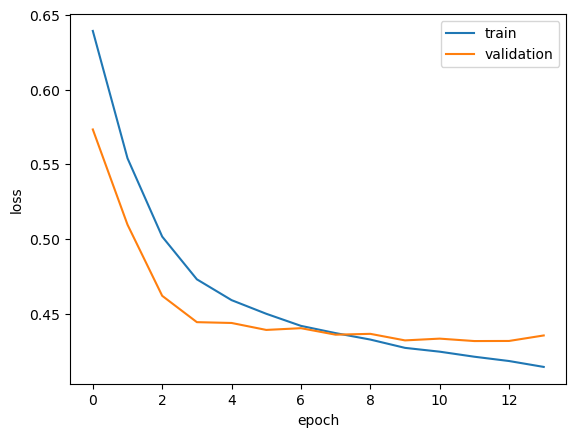

In [172]:
# 손실 곡선
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [173]:
early_stopping_cb.stopped_epoch

13

In [174]:
model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7778 - loss: 0.5100 


[0.48327505588531494, 0.7760416865348816]